In [14]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import os

# Paths
dataset_dir = 'D:\Kuliah\Sem6\Machine Learning\FoodClassification'
images_dir = os.path.join(dataset_dir, 'images')

# Load dataset and split for training/validation/test
train_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join(images_dir, 'train'),
    labels='inferred',
    label_mode='int',
    image_size=(224, 224),
    batch_size=32
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join(images_dir, 'valid'),
    labels='inferred',
    label_mode='int',
    image_size=(224, 224),
    batch_size=32
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join(images_dir, 'test'),
    labels='inferred',
    label_mode='int',
    image_size=(224, 224),
    batch_size=32
)

# Prefetch for performance
train_ds = train_ds.prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=tf.data.AUTOTUNE)

# Now you can proceed with training and evaluation


Found 7546 files belonging to 29 classes.
Found 423 files belonging to 29 classes.
Found 387 files belonging to 29 classes.


In [15]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

def preprocess(image, label):
    # Preprocess the image using MobileNetV2's preprocessing function
    image = preprocess_input(image)
    return image, label

# Apply to datasets
train_ds = train_ds.map(preprocess)
val_ds = val_ds.map(preprocess)
test_ds = test_ds.map(preprocess)


In [16]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
import os

# Paths
dataset_dir = 'C:/Users/ucha/Downloads/food-detection-v2.v32i.coco/output'
images_dir = os.path.join(dataset_dir, 'images')

# Get class names from the 'train' directory (manually)
class_names = os.listdir(os.path.join(images_dir, 'train'))

# Load base model without top layer
base_model = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # Freeze base model

# Unfreeze the last 20 layers for fine-tuning
for layer in base_model.layers[-20:]:
    layer.trainable = True

# Build full model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(len(class_names), activation='softmax')  # Use the manually loaded class names
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 23)             │        29,463 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,287,447 (8.73 MB)

 Trainable params: 1,235,543 (4.71 MB)

 Non-trainable params: 1,051,904 (4.01 MB)

In [17]:
from tensorflow.keras import layers, models
import tensorflow as tf
import os

# Paths
dataset_dir = 'D:\Kuliah\Sem6\Machine Learning\FoodClassification'
images_dir = os.path.join(dataset_dir, 'images')

# Get class names from the 'train' directory (manually)
class_names = os.listdir(os.path.join(images_dir, 'train'))

# Data augmentation layer
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

# Load base model without top layer
base_model = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # Freeze base model

# Unfreeze the last 20 layers for fine-tuning
for layer in base_model.layers[-20:]:
    layer.trainable = True

# Build full model with data augmentation
model = tf.keras.Sequential([
    data_augmentation,           # ← First layer!
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax')  # Output layer based on class names
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_6 (Sequential)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ ?                      │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 1,206,080 (4.60 MB)

 Non-trainable params: 1,051,904 (4.01 MB)

In [18]:
from collections import Counter
import os

# Update with the new dataset directory
image_dir = 'D:\Kuliah\Sem6\Machine Learning\FoodClassification\images'

# Initialize a counter
counts = Counter()

# Traverse the directories for 'train', 'valid', 'test' subdirectories
for split in ['train', 'valid', 'test']:
    split_dir = os.path.join(image_dir, split)
    for label_dir in os.listdir(split_dir):
        label_path = os.path.join(split_dir, label_dir)
        if os.path.isdir(label_path):  # Ensure it's a directory
            # Count the files in the label directory
            num_files = len([f for f in os.listdir(label_path) if f.endswith(('.jpg', '.png', '.jpeg'))])
            counts[label_dir] += num_files

# Print the class distribution
print(counts)


Counter({'soto': 634, 'mie': 487, 'tumis kangkung': 444, 'bakwan': 434, 'gado-gado': 421, 'sate': 420, 'batagor': 411, 'ayam bakar': 407, 'rendang': 386, 'bihun': 382, 'terong balado': 381, 'pempek': 372, 'opor ayam': 339, 'bakso': 335, 'steak': 335, 'udang': 331, 'capcay': 285, 'nasi goreng': 212, 'ikan goreng': 193, 'roti': 162, 'sosis': 160, 'kerupuk': 151, 'nugget': 149, 'telur': 145, 'ayam goreng': 134, 'martabak telur': 96, 'tempe': 70, 'tahu': 66, 'nasi putih': 14})


In [19]:
import os

def list_classes(path):
    # List all class names (subfolders) in the given path
    return sorted([name for name in os.listdir(path) if os.path.isdir(os.path.join(path, name))])

# Paths
train_path = r"D:\Kuliah\Sem6\Machine Learning\FoodClassification\images\train"
valid_path = r"D:\Kuliah\Sem6\Machine Learning\FoodClassification\images\valid"
test_path = r"D:\Kuliah\Sem6\Machine Learning\FoodClassification\images\test"

# List classes for each split
train_classes = list_classes(train_path)
valid_classes = list_classes(valid_path)
test_classes = list_classes(test_path)

# Print out classes for each split
print("Train classes:", train_classes)
print("Valid classes:", valid_classes)
print("Test classes:", test_classes)

# Optionally, print the intersection (common classes)
common_classes = set(train_classes) & set(valid_classes) & set(test_classes)
print("\nCommon classes:", common_classes)


Train classes: ['ayam bakar', 'ayam goreng', 'bakso', 'bakwan', 'batagor', 'bihun', 'capcay', 'gado-gado', 'ikan goreng', 'kerupuk', 'martabak telur', 'mie', 'nasi goreng', 'nasi putih', 'nugget', 'opor ayam', 'pempek', 'rendang', 'roti', 'sate', 'sosis', 'soto', 'steak', 'tahu', 'telur', 'tempe', 'terong balado', 'tumis kangkung', 'udang']
Valid classes: ['ayam bakar', 'ayam goreng', 'bakso', 'bakwan', 'batagor', 'bihun', 'capcay', 'gado-gado', 'ikan goreng', 'kerupuk', 'martabak telur', 'mie', 'nasi goreng', 'nasi putih', 'nugget', 'opor ayam', 'pempek', 'rendang', 'roti', 'sate', 'sosis', 'soto', 'steak', 'tahu', 'telur', 'tempe', 'terong balado', 'tumis kangkung', 'udang']
Test classes: ['ayam bakar', 'ayam goreng', 'bakso', 'bakwan', 'batagor', 'bihun', 'capcay', 'gado-gado', 'ikan goreng', 'kerupuk', 'martabak telur', 'mie', 'nasi goreng', 'nasi putih', 'nugget', 'opor ayam', 'pempek', 'rendang', 'roti', 'sate', 'sosis', 'soto', 'steak', 'tahu', 'telur', 'tempe', 'terong balado',

In [21]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Optional: Save the best model automatically
checkpoint_cb = ModelCheckpoint(
    'best_mobilenetv2_model.h5', save_best_only=True, monitor='val_accuracy', mode='max'
)

# Early stopping to prevent overfitting
early_stop_cb = EarlyStopping(
    monitor='val_accuracy', patience=5, restore_best_weights=True
)

# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    callbacks=[early_stop_cb, checkpoint_cb]
)


Epoch 1/30
236/236 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step - accuracy: 0.5176 - loss: 1.7827

236/236 ━━━━━━━━━━━━━━━━━━━━ 107s 429ms/step - accuracy: 0.5182 - loss: 1.7804 - val_accuracy: 0.3239 - val_loss: 6.9073
Epoch 2/30
236/236 ━━━━━━━━━━━━━━━━━━━━ 98s 415ms/step - accuracy: 0.8236 - loss: 0.6811 - val_accuracy: 0.3215 - val_loss: 8.6478
Epoch 3/30
236/236 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step - accuracy: 0.8673 - loss: 0.4847

236/236 ━━━━━━━━━━━━━━━━━━━━ 96s 406ms/step - accuracy: 0.8674 - loss: 0.4844 - val_accuracy: 0.3924 - val_loss: 10.1091
Epoch 4/30
236/236 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - accuracy: 0.9053 - loss: 0.3406

236/236 ━━━━━━━━━━━━━━━━━━━━ 99s 419ms/step - accuracy: 0.9053 - loss: 0.3406 - val_accuracy: 0.4350 - val_loss: 7.9784
Epoch 5/30
236/236 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step - accuracy: 0.9197 - loss: 0.2836

236/236 ━━━━━━━━━━━━━━━━━━━━ 97s 411ms/step - accuracy: 0.9197 - loss: 0.2835 - val_accuracy: 0.5225 - val_loss: 5.6150
Epoch 6/30
236/236 ━━━━━━━━━━━━━━━━━━━━ 94s 397ms/step - accuracy: 0.9195 - loss: 0.2726 - val_accuracy: 0.5083 - val_loss: 5.9653
Epoch 7/30
236/236 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step - accuracy: 0.9333 - loss: 0.2411

236/236 ━━━━━━━━━━━━━━━━━━━━ 97s 412ms/step - accuracy: 0.9333 - loss: 0.2410 - val_accuracy: 0.5603 - val_loss: 5.5480
Epoch 8/30
236/236 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step - accuracy: 0.9417 - loss: 0.2089

236/236 ━━━━━━━━━━━━━━━━━━━━ 98s 413ms/step - accuracy: 0.9418 - loss: 0.2088 - val_accuracy: 0.6407 - val_loss: 4.4109
Epoch 9/30
236/236 ━━━━━━━━━━━━━━━━━━━━ 99s 418ms/step - accuracy: 0.9522 - loss: 0.1781 - val_accuracy: 0.5863 - val_loss: 5.6349
Epoch 10/30
236/236 ━━━━━━━━━━━━━━━━━━━━ 96s 404ms/step - accuracy: 0.9497 - loss: 0.1736 - val_accuracy: 0.6147 - val_loss: 4.5815
Epoch 11/30
236/236 ━━━━━━━━━━━━━━━━━━━━ 98s 415ms/step - accuracy: 0.9621 - loss: 0.1378 - val_accuracy: 0.5579 - val_loss: 5.8626
Epoch 12/30
236/236 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step - accuracy: 0.9575 - loss: 0.1469

236/236 ━━━━━━━━━━━━━━━━━━━━ 97s 412ms/step - accuracy: 0.9576 - loss: 0.1469 - val_accuracy: 0.6430 - val_loss: 4.4885
Epoch 13/30
236/236 ━━━━━━━━━━━━━━━━━━━━ 100s 422ms/step - accuracy: 0.9601 - loss: 0.1541 - val_accuracy: 0.5863 - val_loss: 5.0844
Epoch 14/30
236/236 ━━━━━━━━━━━━━━━━━━━━ 97s 412ms/step - accuracy: 0.9705 - loss: 0.1161 - val_accuracy: 0.6265 - val_loss: 4.3741
Epoch 15/30
236/236 ━━━━━━━━━━━━━━━━━━━━ 101s 426ms/step - accuracy: 0.9679 - loss: 0.1138 - val_accuracy: 0.6383 - val_loss: 4.1893
Epoch 16/30
236/236 ━━━━━━━━━━━━━━━━━━━━ 101s 428ms/step - accuracy: 0.9650 - loss: 0.1146 - val_accuracy: 0.6076 - val_loss: 6.2560
Epoch 17/30
236/236 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step - accuracy: 0.9661 - loss: 0.1390

236/236 ━━━━━━━━━━━━━━━━━━━━ 100s 425ms/step - accuracy: 0.9661 - loss: 0.1389 - val_accuracy: 0.7116 - val_loss: 3.8476
Epoch 18/30
236/236 ━━━━━━━━━━━━━━━━━━━━ 101s 428ms/step - accuracy: 0.9735 - loss: 0.0917 - val_accuracy: 0.6690 - val_loss: 3.5689
Epoch 19/30
236/236 ━━━━━━━━━━━━━━━━━━━━ 98s 416ms/step - accuracy: 0.9736 - loss: 0.0952 - val_accuracy: 0.6974 - val_loss: 4.1023
Epoch 20/30
236/236 ━━━━━━━━━━━━━━━━━━━━ 97s 410ms/step - accuracy: 0.9752 - loss: 0.0858 - val_accuracy: 0.6950 - val_loss: 3.5210
Epoch 21/30
236/236 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step - accuracy: 0.9704 - loss: 0.1044

236/236 ━━━━━━━━━━━━━━━━━━━━ 95s 400ms/step - accuracy: 0.9704 - loss: 0.1044 - val_accuracy: 0.7470 - val_loss: 2.8736
Epoch 22/30
236/236 ━━━━━━━━━━━━━━━━━━━━ 96s 406ms/step - accuracy: 0.9727 - loss: 0.0946 - val_accuracy: 0.7423 - val_loss: 2.6134
Epoch 23/30
236/236 ━━━━━━━━━━━━━━━━━━━━ 97s 410ms/step - accuracy: 0.9770 - loss: 0.0837 - val_accuracy: 0.7400 - val_loss: 2.8931
Epoch 24/30
236/236 ━━━━━━━━━━━━━━━━━━━━ 94s 399ms/step - accuracy: 0.9793 - loss: 0.0719 - val_accuracy: 0.6927 - val_loss: 3.3639
Epoch 25/30
236/236 ━━━━━━━━━━━━━━━━━━━━ 97s 410ms/step - accuracy: 0.9803 - loss: 0.0750 - val_accuracy: 0.6832 - val_loss: 3.0951
Epoch 26/30
236/236 ━━━━━━━━━━━━━━━━━━━━ 98s 416ms/step - accuracy: 0.9747 - loss: 0.0951 - val_accuracy: 0.7447 - val_loss: 2.4148


In [22]:
from tensorflow.keras.models import load_model

# Load the best model saved by ModelCheckpoint
model = load_model('best_mobilenetv2_model.h5')


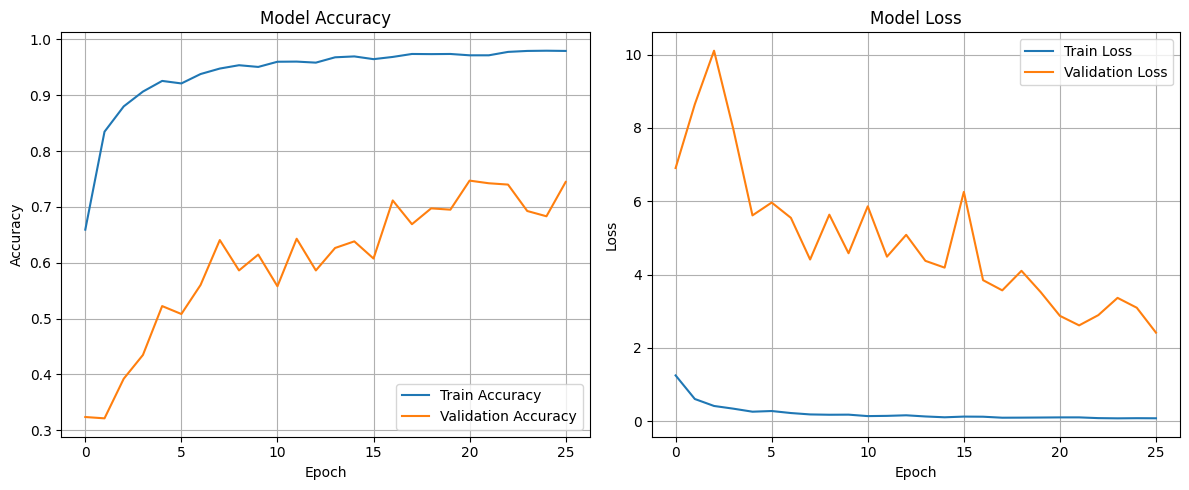

In [23]:
import matplotlib.pyplot as plt

# Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [24]:
# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(test_ds)

# Print nicely formatted results
print(f"\n📌 Test Accuracy: {accuracy:.4f} | Test Loss: {loss:.4f}")


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 303ms/step - accuracy: 0.8588 - loss: 1.2497

📌 Test Accuracy: 0.8734 | Test Loss: 1.0165


In [ ]:
import pickle

# Save the training history
with open('training_history.pkl', 'wb') as f:
    pickle.dump(history.history, f)
#     # Load the training history
# with open('training_history.pkl', 'rb') as f:
#     loaded_history = pickle.load(f)

# # Now loaded_history is the same as history.history



In [28]:
class_names = [
    'ayam bakar', 'ayam goreng', 'bakso', 'bakwan', 'batagor', 'bihun',
    'capcay', 'gado-gado', 'ikan goreng', 'kerupuk', 'martabak telur', 'mie',
    'nasi goreng', 'nasi putih', 'nugget', 'opor ayam', 'pempek', 'rendang',
    'roti', 'sate', 'sosis', 'soto', 'steak', 'tahu', 'telur', 'tempe',
    'terong balado', 'tumis kangkung', 'udang'
]


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


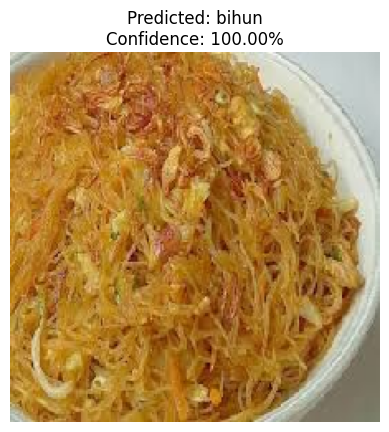

('bihun', 100.0)

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing import image as keras_image

# 1. Load your trained model
model = tf.keras.models.load_model('best_mobilenetv2_model.h5')

# 2. Define the class names (based on your dataset)
class_names = [
    'ayam bakar', 'ayam goreng', 'bakso', 'bakwan', 'batagor', 'bihun',
    'capcay', 'gado-gado', 'ikan goreng', 'kerupuk', 'martabak telur', 'mie',
    'nasi goreng', 'nasi putih', 'nugget', 'opor ayam', 'pempek', 'rendang',
    'roti', 'sate', 'sosis', 'soto', 'steak', 'tahu', 'telur', 'tempe',
    'terong balado', 'tumis kangkung', 'udang'
]

# 3. Define the prediction function
def predict_single_image(image_path):
    # Load and preprocess the image
    img = keras_image.load_img(image_path, target_size=(224, 224))
    img_array = keras_image.img_to_array(img)
    img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict
    prediction = model.predict(img_array)
    predicted_index = np.argmax(prediction)
    predicted_label = class_names[predicted_index]
    confidence = float(np.max(prediction)) * 100  # Convert to percentage

    # Show the result
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_label}\nConfidence: {confidence:.2f}%")
    plt.axis("off")
    plt.show()

    return predicted_label, confidence

# 4. Example usage
predict_single_image("D:/Kuliah/Sem6/Machine Learning/FoodClassification/bihun1.jpg")


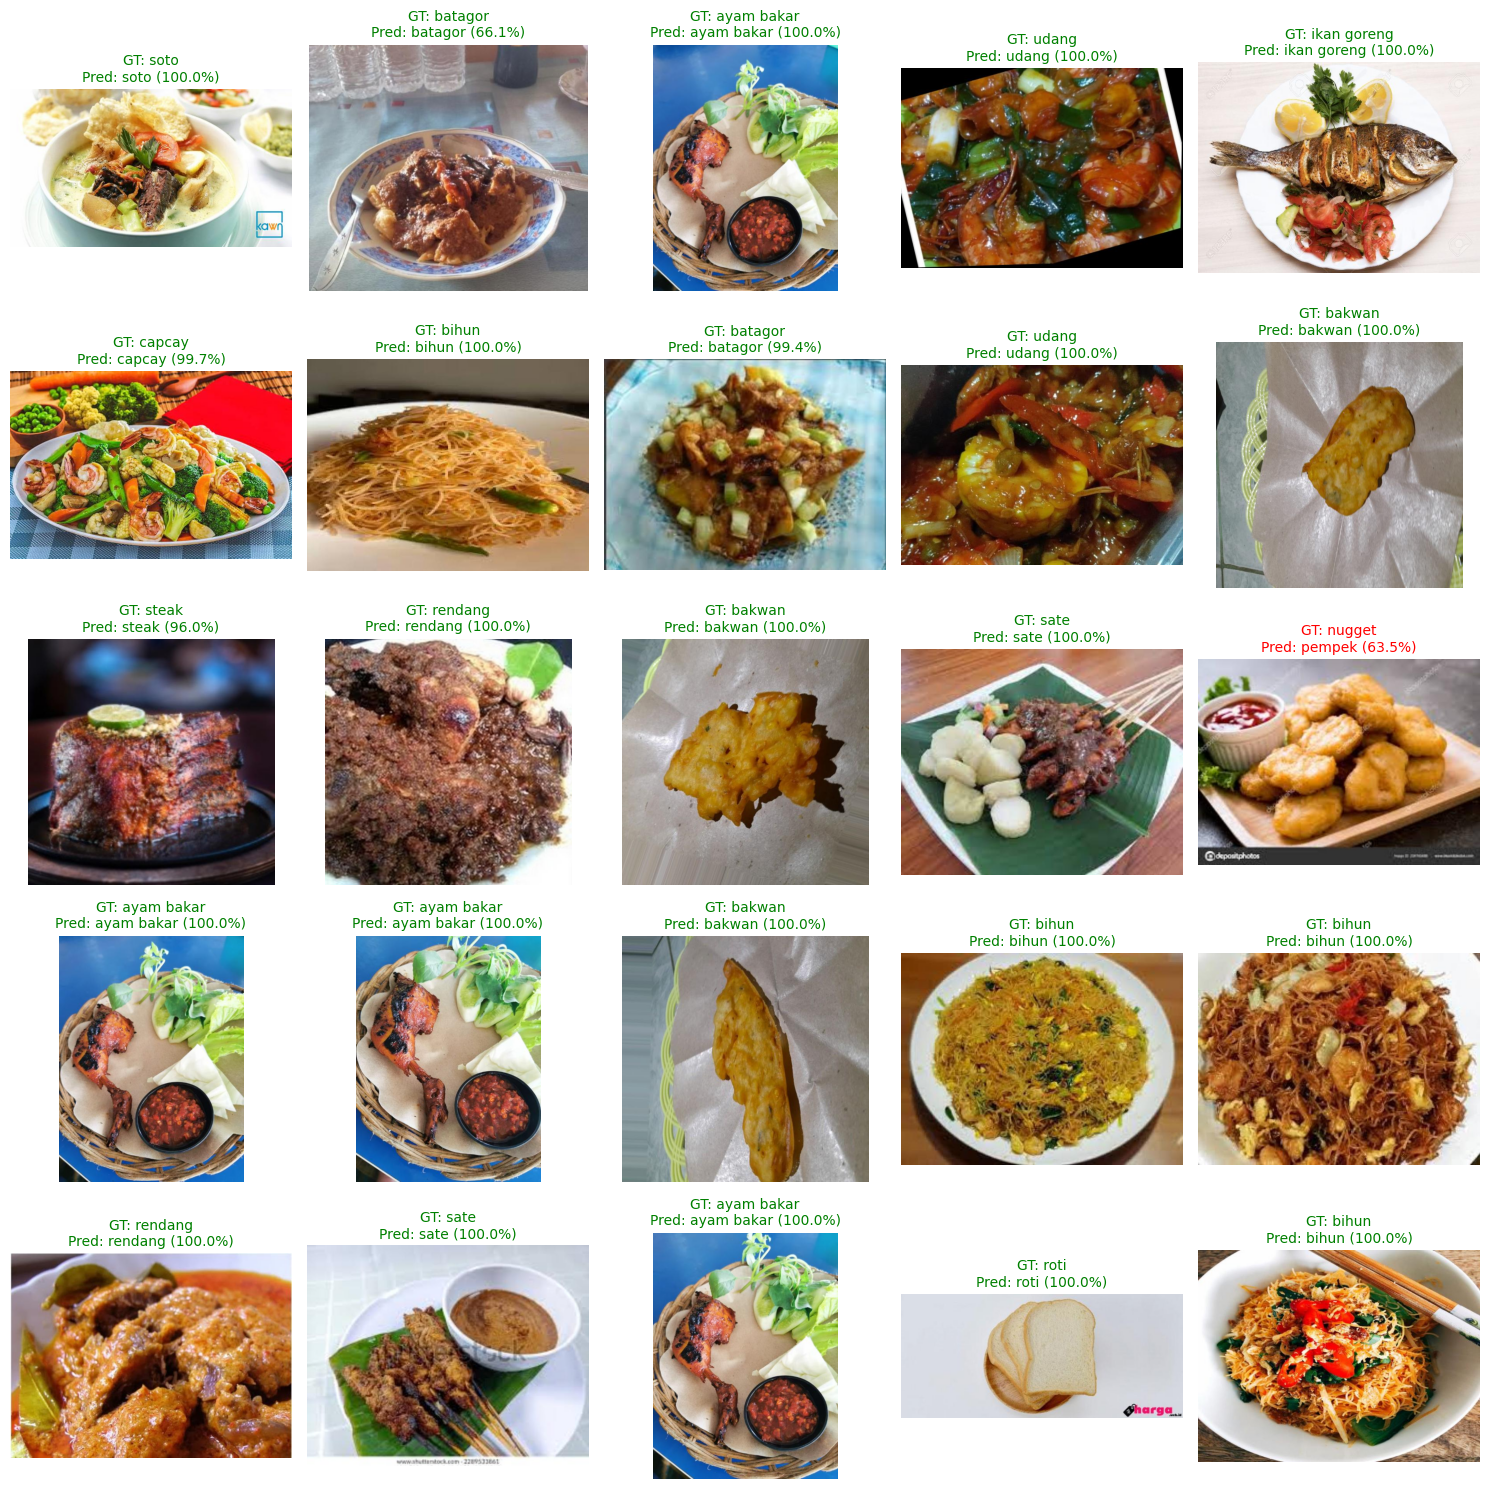

In [41]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from PIL import Image
from pathlib import Path
import tensorflow as tf

# === Paths ===
test_dir = "D:/Kuliah/Sem6/Machine Learning/FoodClassification/images/test"  # <<< Set your test images directory
model_path = "best_mobilenetv2_model.h5"

# === Class names ===
class_names = [
    'ayam bakar', 'ayam goreng', 'bakso', 'bakwan', 'batagor', 'bihun',
    'capcay', 'gado-gado', 'ikan goreng', 'kerupuk', 'martabak telur', 'mie',
    'nasi goreng', 'nasi putih', 'nugget', 'opor ayam', 'pempek', 'rendang',
    'roti', 'sate', 'sosis', 'soto', 'steak', 'tahu', 'telur', 'tempe',
    'terong balado', 'tumis kangkung', 'udang'
]
class_to_idx = {name: idx for idx, name in enumerate(class_names)}
idx_to_class = {idx: name for name, idx in class_to_idx.items()}

# === Load Model ===
model = load_model(model_path)

# === Parameters ===
img_size = (224, 224)
n_images = 25  # Grid: 5x5

# === Load Test Samples ===
# Build (image_path, true_label) list from test folder structure
test_samples = []
for class_folder in os.listdir(test_dir):
    class_folder_path = os.path.join(test_dir, class_folder)
    if os.path.isdir(class_folder_path):
        for img_file in os.listdir(class_folder_path):
            if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
                rel_path = os.path.join(class_folder, img_file)
                test_samples.append((rel_path, class_folder))

# === Plotting Function ===
def plot_predictions_grid(samples):
    plt.figure(figsize=(15, 15))
    
    for i, (img_rel_path, true_label) in enumerate(samples):
        full_img_path = os.path.join(test_dir, img_rel_path)
        img = Image.open(full_img_path).convert("RGB")
        img_resized = img.resize(img_size)

        # Preprocess
        x = image.img_to_array(img_resized)
        x = preprocess_input(x)
        x = np.expand_dims(x, axis=0)

        # Predict
        preds = model.predict(x, verbose=0)[0]
        pred_idx = np.argmax(preds)
        pred_class = idx_to_class[pred_idx]
        confidence = preds[pred_idx] * 100

        # Ground truth
        correct = (pred_class == true_label)

        # Show image
        plt.subplot(5, 5, i + 1)
        plt.imshow(img)
        plt.axis("off")

        # Title
        title = f"GT: {true_label}\nPred: {pred_class} ({confidence:.1f}%)"
        color = "green" if correct else "red"
        plt.title(title, color=color, fontsize=10)

    plt.tight_layout()
    plt.show()

# === Run Visualization on Random 25 ===
random.seed(42)
sampled = random.sample(test_samples, n_images)
plot_predictions_grid(sampled)
